# ABOUT DATASET

New York City Airbnb Data Cleaning

Airbnb, Inc is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app. Airbnb does not own any of the listed properties; instead, it profits by receiving commission from each booking. The company was founded in 2008. Airbnb is a shortened version of its original name, AirBedandBreakfast.com.

<h3>About Dataset</h3>
<h3>Context</h3>

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in New York City

<h3>Content</h3>

The following Airbnb activity is included in this New York dataset:

Listings, including full descriptions and average review score Reviews, including unique id for each reviewer and detailed comments Calendar, including listing id and the price and availability for that day

<h3>Inspiration</h3>
+ What can we learn about different hosts and areas?

+ What can we learn from predictions? (ex: locations, prices, reviews, etc)

+ Which hosts are the busiest and why?

# LOAD LIBRARIES

In [1]:
! pip install matplotlib
!pip install seaborn
import os
import sys
import csv
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# LOAD DATASET

In [2]:
df = pd.read_csv("C:/Users/ADmin/Downloads/Airbnb_Open_Data.csv")

In [3]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
print("Number of records: {}".format(df.shape[0]))
print("Number of columns: {}".format(df.shape[1]))

Number of records: 102599
Number of columns: 26


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

# CLEAN DATASET

In [6]:
# drop duplicates
df.drop_duplicates(inplace=True)
print("Number of records: {}".format(df.shape[0]))
print("Number of columns: {}".format(df.shape[1]))
df.reset_index(inplace=True, drop=True)

Number of records: 102058
Number of columns: 26


In [7]:
print(df.columns.to_list())

['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules', 'license']


In [8]:
# lower all the column names, change " " to "_" to all column names
df.columns = [col.lower().replace(" ","_") for col in df.columns]
print(df.columns.to_list())

['id', 'name', 'host_id', 'host_identity_verified', 'host_name', 'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country', 'country_code', 'instant_bookable', 'cancellation_policy', 'room_type', 'construction_year', 'price', 'service_fee', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'review_rate_number', 'calculated_host_listings_count', 'availability_365', 'house_rules', 'license']


**Now we will handle MISSING DATA**

In [9]:
df.isnull().sum()


id                                     0
name                                 250
host_id                                0
host_identity_verified               289
host_name                            404
neighbourhood_group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country_code                         131
instant_bookable                     105
cancellation_policy                   76
room_type                              0
construction_year                    214
price                                247
service_fee                          273
minimum_nights                       400
number_of_reviews                    183
last_review                        15832
reviews_per_month                  15818
review_rate_number                   319
calculated_host_listings_count       319
availability_365                     448
house_rules     

In [10]:
#calculate the % missing values
percentage_result = df.isnull().sum()/ len(df) * 100
# create a DataFrame to show case the result
percentage_result = pd.DataFrame({"columns": percentage_result.keys(), "%": percentage_result})
percentage_result.reset_index(drop=True, inplace=True)
percentage_result

,columns,%
0,id,0.000000
1,name,0.244959
2,host_id,0.000000
3,host_identity_verified,0.283172
4,host_name,0.395853
5,neighbourhood_group,0.028415
6,neighbourhood,0.015677
7,lat,0.007839
8,long,0.007839
9,country,0.521272


In [29]:
# host_identity_verified, neighbourhood, country
# we will fill null values with "Unknown"

df['host_identity_verified'] = np.where(df['host_identity_verified'].isnull(), 'Unknown', df['host_identity_verified'])
df['neighbourhood'] = np.where(df['neighbourhood'].isnull(), 'Unknown', df['neighbourhood'])
df['neighbourhood_group'] = np.where(df['neighbourhood_group'].isnull(), 'Unknown', df['neighbourhood_group'])
 # Because the research is conducted in New York so we will fill null value with United States 
df['country'] = np.where(df['country'].isnull(), 'United States', df['country'])

In [12]:
# review_rate_number
# we will fill null values with -1 (Becasue rating is from 1-5)
df['review_rate_number'] = np.where(df['review_rate_number'].isnull(), -1, df['review_rate_number'])

In [13]:
# we will exclude some unnecessaray columns from the dataset (license has too much missing value and id is not needed)
df.drop(["id", "license"], axis = 1, inplace = True)


In [14]:
df.head()

,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
0,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,...,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,...,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,Unknown,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,...,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
3,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,...,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN
4,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,...,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."


# EDA (EXPLORATORY DATA ANALYSIS)

### COUNTRY

In [28]:
# COUNT VALUES
print(df['country'].value_counts())
# COUNT VALUES IN PERCENTAGE 
print(df['country'].value_counts() * 100 / len(df))

United States    102058
Name: country, dtype: int64
United States    100.0
Name: country, dtype: float64


### HOST_IDENTITY_VERIFIED

In [16]:
# COUNT VALUES
print(df['host_identity_verified'].value_counts())
# COUNT VALUES IN PERCENTAGE 
print(df['host_identity_verified'].value_counts() * 100 / len(df))

unconfirmed    50944
verified       50825
Unknown          289
Name: host_identity_verified, dtype: int64
unconfirmed    49.916714
verified       49.800114
Unknown         0.283172
Name: host_identity_verified, dtype: float64


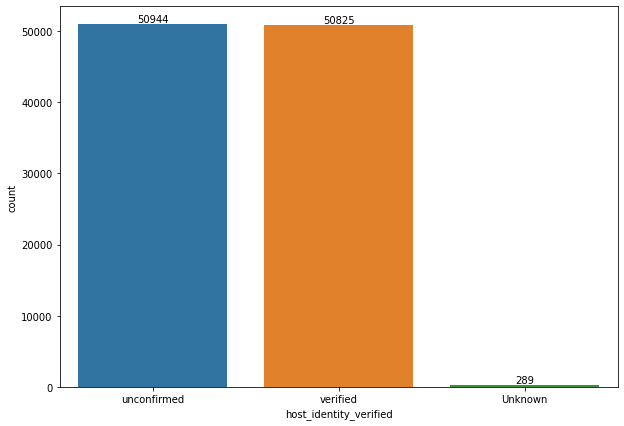

In [41]:
plt.figure(figsize=(10,7))
plt.xlabel("feature: {}".format("host_identity_verified"))
ax = sns.countplot(data=df, x='host_identity_verified')
ax.bar_label(ax.containers[0])
plt.show()

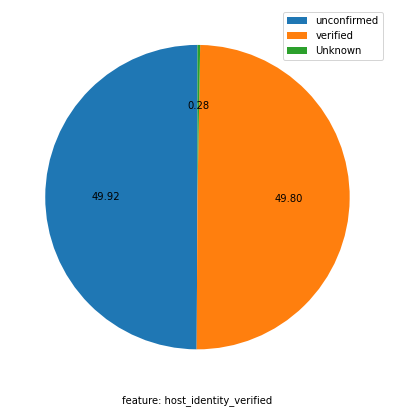

In [18]:
plt.figure(figsize=(10,7))
plt.xlabel("feature: {}".format("host_identity_verified"))
plt.pie(df['host_identity_verified'].value_counts()*100/len(df), autopct='%.2f', startangle=90)
plt.legend(df['host_identity_verified'])
plt.show()

### NEIGHBORHOOD

In [19]:
# COUNT VALUES
print(df['neighbourhood'].value_counts())
# COUNT VALUES IN PERCENTAGE 
print(df['neighbourhood'].value_counts() * 100 / len(df))

Bedford-Stuyvesant        7898
Williamsburg              7732
Harlem                    5441
Bushwick                  4956
Hell's Kitchen            3949
                          ... 
Willowbrook                  3
Gerritsen Beach              3
Fort Wadsworth               2
Glen Oaks                    2
Chelsea, Staten Island       1
Name: neighbourhood, Length: 225, dtype: int64
Bedford-Stuyvesant        7.738737
Williamsburg              7.576084
Harlem                    5.331282
Bushwick                  4.856062
Hell's Kitchen            3.869368
                            ...   
Willowbrook               0.002940
Gerritsen Beach           0.002940
Fort Wadsworth            0.001960
Glen Oaks                 0.001960
Chelsea, Staten Island    0.000980
Name: neighbourhood, Length: 225, dtype: float64


### NEIGHBORHOOD_GROUP

In [31]:
# COUNT VALUES
print(df['neighbourhood_group'].value_counts())
# COUNT VALUES IN PERCENTAGE 
print(df['neighbourhood_group'].value_counts() * 100 / len(df))

Manhattan        43557
Brooklyn         41630
Queens           13197
Bronx             2694
Staten Island      949
Unknown             29
brookln              1
manhatan             1
Name: neighbourhood_group, dtype: int64
Manhattan        42.678673
Brooklyn         40.790531
Queens           12.930882
Bronx             2.639675
Staten Island     0.929863
Unknown           0.028415
brookln           0.000980
manhatan          0.000980
Name: neighbourhood_group, dtype: float64


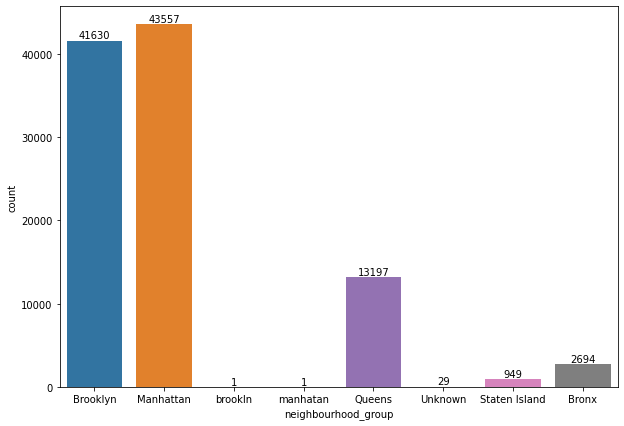

In [37]:
plt.figure(figsize=(10,7))
plt.xlabel("feature: {}".format("neighbourhood_group"))
ax = sns.countplot(data=df, x='neighbourhood_group')
ax.bar_label(ax.containers[0])
plt.show()

### REVIEW_RATE_NUMBER

In [20]:
# COUNT VALUES
print(df['review_rate_number'].value_counts())
# COUNT VALUES IN PERCENTAGE 
print(df['review_rate_number'].value_counts() * 100 / len(df))

 5.0    23251
 4.0    23200
 3.0    23130
 2.0    22972
 1.0     9186
-1.0      319
Name: review_rate_number, dtype: int64
 5.0    22.782143
 4.0    22.732172
 3.0    22.663583
 2.0    22.508770
 1.0     9.000764
-1.0     0.312567
Name: review_rate_number, dtype: float64


In [21]:
# change float to int
df['review_rate_number'] = df['review_rate_number'].astype('int64',errors='ignore')
df['review_rate_number'] 

0         4
1         4
2         5
3         4
4         3
         ..
102053    5
102054    3
102055    4
102056    1
102057    4
Name: review_rate_number, Length: 102058, dtype: int64

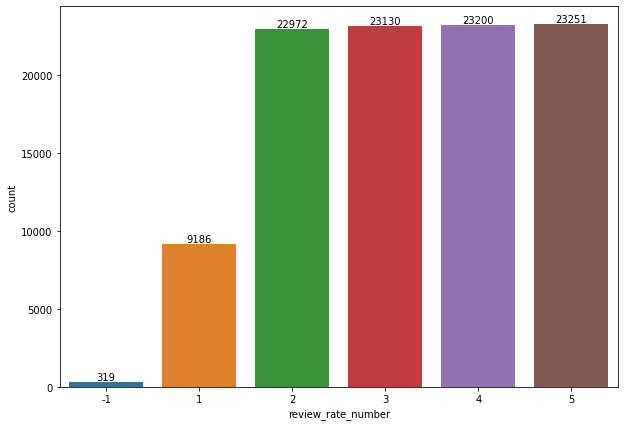

In [38]:
plt.figure(figsize=(10,7))
plt.xlabel("feature: {}".format("review_rate_number"))
ax = sns.countplot(data=df, x='review_rate_number')
ax.bar_label(ax.containers[0])
plt.show()

### ROOM_TYPE

In [23]:
# COUNT VALUES
print(df['room_type'].value_counts())
# COUNT VALUES IN PERCENTAGE 
print(df['room_type'].value_counts() * 100 / len(df))

Entire home/apt    53429
Private room       46306
Shared room         2208
Hotel room           115
Name: room_type, dtype: int64
Entire home/apt    52.351604
Private room       45.372239
Shared room         2.163476
Hotel room          0.112681
Name: room_type, dtype: float64


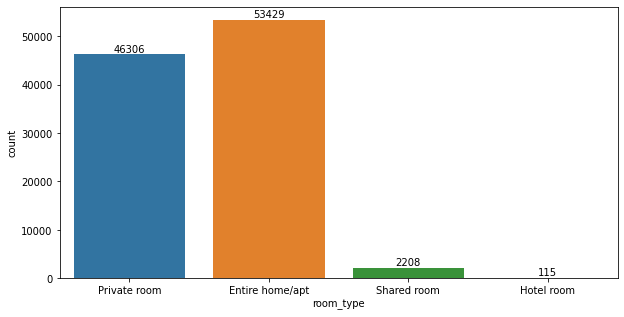

In [39]:
plt.figure(figsize=(10,5))
plt.xlabel("feature: {}".format("room_type"))
ax = sns.countplot(data=df, x='room_type')
ax.bar_label(ax.containers[0])
plt.show()

# OBTAIN INSIGHTS FROM THE DATASET

### * TOP 10 NEIGHBORHOOD HAVING THE BEST AVERAGE REVIEW RATE SCORE 

In [25]:
avg_rating_per_neighbourhood = df.groupby(['neighbourhood'])['review_rate_number'].mean().sort_values(ascending=False)[0:10]
print(avg_rating_per_neighbourhood)

neighbourhood
Glen Oaks          4.500000
Co-op City         4.400000
Gerritsen Beach    4.333333
Huguenot           4.111111
Woodrow            4.000000
Silver Lake        4.000000
West Farms         4.000000
Eltingville        4.000000
Todt Hill          4.000000
Rosebank           3.928571
Name: review_rate_number, dtype: float64


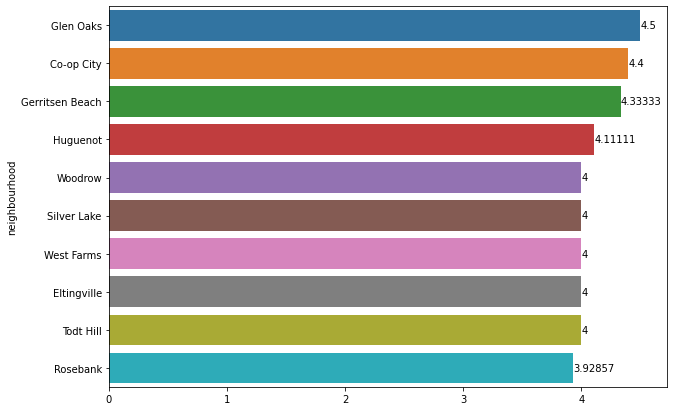

In [40]:
plt.figure(figsize=(10,7))
ax = sns.barplot(x=avg_rating_per_neighbourhood.values, y=avg_rating_per_neighbourhood.index)
ax.bar_label(ax.containers[0])
plt.show()